In [51]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#img = cv2.imread('Lid UP cropped plus.png')
#b, g, r = cv2.split(img)
#rgb_img = cv2.merge([r, g, b])

#rgb_img = cv2.medianBlur(rgb_img, 9)
#gimg = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
#thresh = cv2.adaptiveThreshold(gimg, 165,
#                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
#                               cv2.THRESH_BINARY_INV,11,2)
#th, im_th = cv2.threshold(gimg, 165, 255, cv2.THRESH_BINARY_INV)

#im_floodfill = im_th.copy()

#h, w = im_th.shape[:2]
#mask = np.zeros((h + 2, w + 2), np.uint8)

#cv2.floodFill(im_floodfill, mask, (0, 0), 255)

#im_floodfill_inv = cv2.bitwise_not(floodfill)

#im_out = im_th | im_floodfill_inv

#plt.figure()
#plt.imshow(im_th, cmap='gray', interpolation='none')
#plt.figure()
#plt.imshow(im_floodfill, cmap='gray', interpolation='none')
#plt.figure()
#plt.imshow(im_floodfill_inv, cmap='gray', interpolation='none')
#plt.figure()
#plt.imshow(im_out, cmap='gray')

AttributeError: 'module' object has no attribute 'meanBlur'

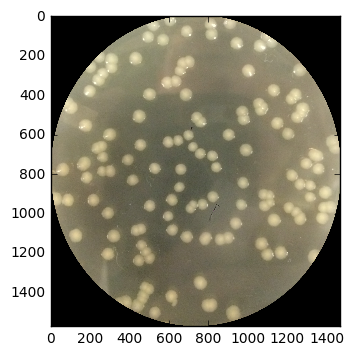

In [58]:
img = cv2.imread('Lid UP cropped plus.png')
b, g, r = cv2.split(img)
rgb_img = cv2.merge([r, g, b])
plt.figure()
plt.imshow(rgb_img)

rgb_img = cv2.medianBlur(rgb_img, 9)
rgb_img = cv2.meaBlur(rgb_img, 9)
plt.figure()
plt.imshow(rgb_img)
gimg = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
thresh = cv2.adaptiveThreshold(gimg, 165,
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV,11,2)
#th, im_th = cv2.threshold(gimg, 165, 255, cv2.THRESH_BINARY_INV)

im2, contours, hierarchy = cv2.findContours(thresh, 
                                            cv2.RETR_TREE,
                                            cv2.CHAIN_APPROX_SIMPLE)
copy = rgb_img.copy()
cv2.drawContours(rgb_img, contours, -1, (0, 255, 0), 3)
print(len(contours))


plt.figure()
plt.imshow(thresh, cmap='gray')
plt.figure()
plt.imshow(rgb_img)

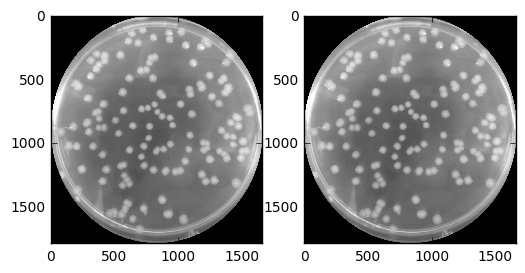

254 0


In [53]:
fig1 = plt.figure()
fig2 = plt.figure()
63
copy_gimg = np.asarray(gimg)
dst = np.zeros(shape=(len(gimg), len(gimg[0])))

b = cv2.normalize(copy_gimg, dst, alpha=140, beta=150, 
                           norm_type=cv2.NORM_MINMAX, 
                           dtype=cv2.CV_32F)
ax = fig1.add_subplot(121)
ax.imshow(gimg, cmap='gray')

ax = fig1.add_subplot(122)
ax.imshow(b, cmap='gray')

plt.show()
print np.max(gimg), np.min(gimg)

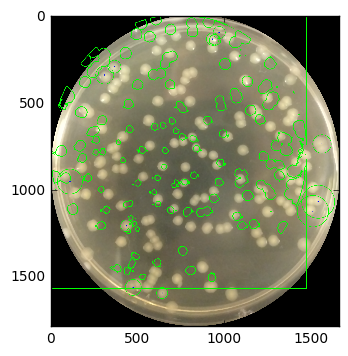

In [54]:
circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, 
                           1, 20,
                           param1=50, param2=30,
                           minRadius=30, maxRadius=100)

circles = np.uint16(np.around(circles))
for i in circles[0, :]:
    cv2.circle(rgb_img, (i[0], i[1]), i[2], (0, 255, 0), 2)
    cv2.circle(rgb_img, (i[0], i[1]), 2, (0, 0, 255), 3)
    
plt.imshow(rgb_img)